In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
Cars_data=pd.read_excel(r"C:\Users\Madan\Downloads\Cars.xlsx")
Cars_df=pd.DataFrame(Cars_data)

X=Cars_df.drop(columns='price')
Y=Cars_df.loc[:,['price']]

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300,400],
    'max_depth': [None, 20,30],
    'min_samples_split': [1,2, 5],
    'min_samples_leaf': [1, 2],
    'max_features':[1,2,3,4]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_predictions = best_rf_model.predict(X_test)

C:\Users\Madan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Madan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Madan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Madan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 638, in _validate_params
    vali

Best Hyperparameters: {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


C:\Users\Madan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 10633879.015142309
R-Squared train: 0.9771938991551493
R-Squared test: 0.8319648520094697
Out-of-Bag (OOB) Score: 0.8551847715762753


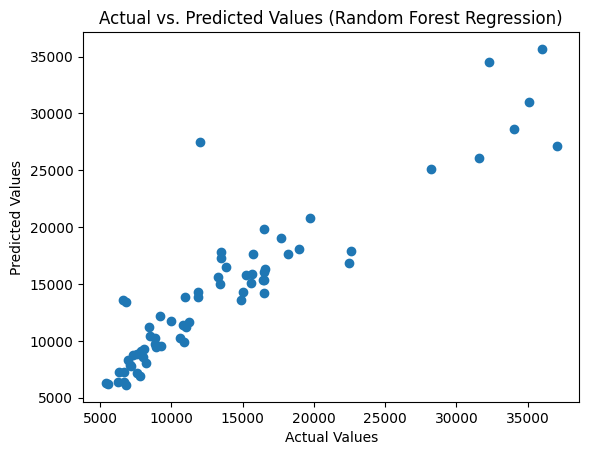

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=300,max_depth=None,min_samples_split=2,max_features=4,min_samples_leaf=1,random_state=10,oob_score=True)
rf_regressor.fit(X_train, y_train)

y_pred_train = rf_regressor.predict(X_train)

# Make predictions on the test set
y_pred_test = rf_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
r_score_train=r2_score(y_train, y_pred_train)
r_score_test=r2_score(y_test, y_pred_test)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared train: {r_score_train}')
print(f'R-Squared test: {r_score_test}')
oob_score = rf_regressor.oob_score_
print(f'Out-of-Bag (OOB) Score: {oob_score}')

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regression)')
plt.show()